In [1]:
!pip install tensorflow-addons

In [2]:
!pip install keras_tuner

In [3]:
#import libraries
import os #to import library os
import cv2 #to import library cv2
import numpy as np #to import numpy as np
import matplotlib.pyplot as plt #to import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Layer, InputSpec
# import tensorflow_addons as tfa #to import tensorflow_adds as tfa
from tensorflow.keras import datasets, layers, models
import inspect

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
import numpy as np
import random

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [6]:
#to access the data file from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
image_path = "drive/MyDrive/IMGS-TESIS-NUEVAS/Imagenes catalogadas" # path of the image
image_list = os.listdir(image_path) #to obtain a list of the image's name

In [8]:

from PIL import Image
images = [] #to make a new list
labels = []
for image_name in image_list:  #to make a loop to go through the image's name in the the image_list variable
  path = os.path.join(image_path, image_name) #to obtain the path of the image
  image = Image.open(path,)
  image = image.resize((250, 250))
  if image.mode != 'L':
    image = image.convert('L')
  # new_image.save('myimage_500.jpg')
  images.append(image) #to save the image in the list
  if image_name.find("PVA_MCC_0") == 0:
    label = 33.18
    labels.append(label)
  if image_name.find("PVA_MCC_1") == 0:
    label = 18.87
    labels.append(label)
  if image_name.find("PVA_MCC_3") == 0:
    label = 18.74
    labels.append(label)
  if image_name.find("PVA_MCC_5") == 0:
    label = 14.23
    labels.append(label)

In [9]:
images = np.array(images)
print(images.shape)

(47, 250, 250)


Text(0.5, 0, '18.74')

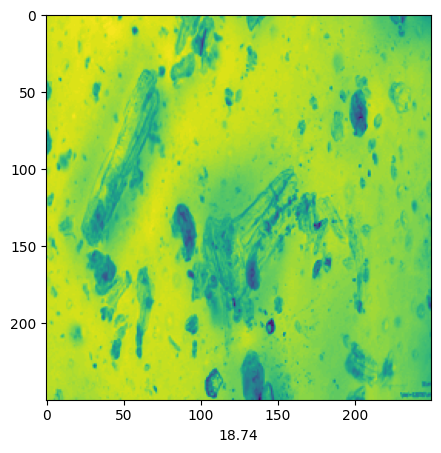

In [10]:
#to plot the images
plt.figure(figsize=(5,5))
plt.imshow(images[17])
plt.xlabel(labels[17])

In [11]:
images = tf.convert_to_tensor(images, dtype=tf.float32)

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import losses


def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


mse = tf.keras.losses.MeanSquaredError()
tf.keras.utils.get_custom_objects().update({'mse': mse})
model = tf.keras.models.load_model('optimized_hyperparameters_model.h5', custom_objects={'mse': mse})

In [13]:
predictions = model.predict(images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


In [14]:
count=0
for i, j in zip(labels, predictions):
  pred = j[0]
  theo = i
  error = float(abs(pred-theo)*100/theo)
  if error < 5:

    count +=1
print(count)
print("hits: %", round(count*100/47, 2))

43
hits: % 91.49


# Prepare data

In [15]:
preds = []
for p in predictions:
  preds.append(p[0])
result = list(zip(preds, labels))

pva_0, pva_1, pva_2, pva_3 = [], [], [], []
for i in range(47):
  if result[i][1] == 33.18:

    pva_0.append(result[i][0])
  if result[i][1] == 18.87:

    pva_1.append(result[i][0])
  if result[i][1] == 18.74:

    pva_2.append(result[i][0])
  if result[i][1] == 14.23:

    pva_3.append(result[i][0])

# Statitical Analysis



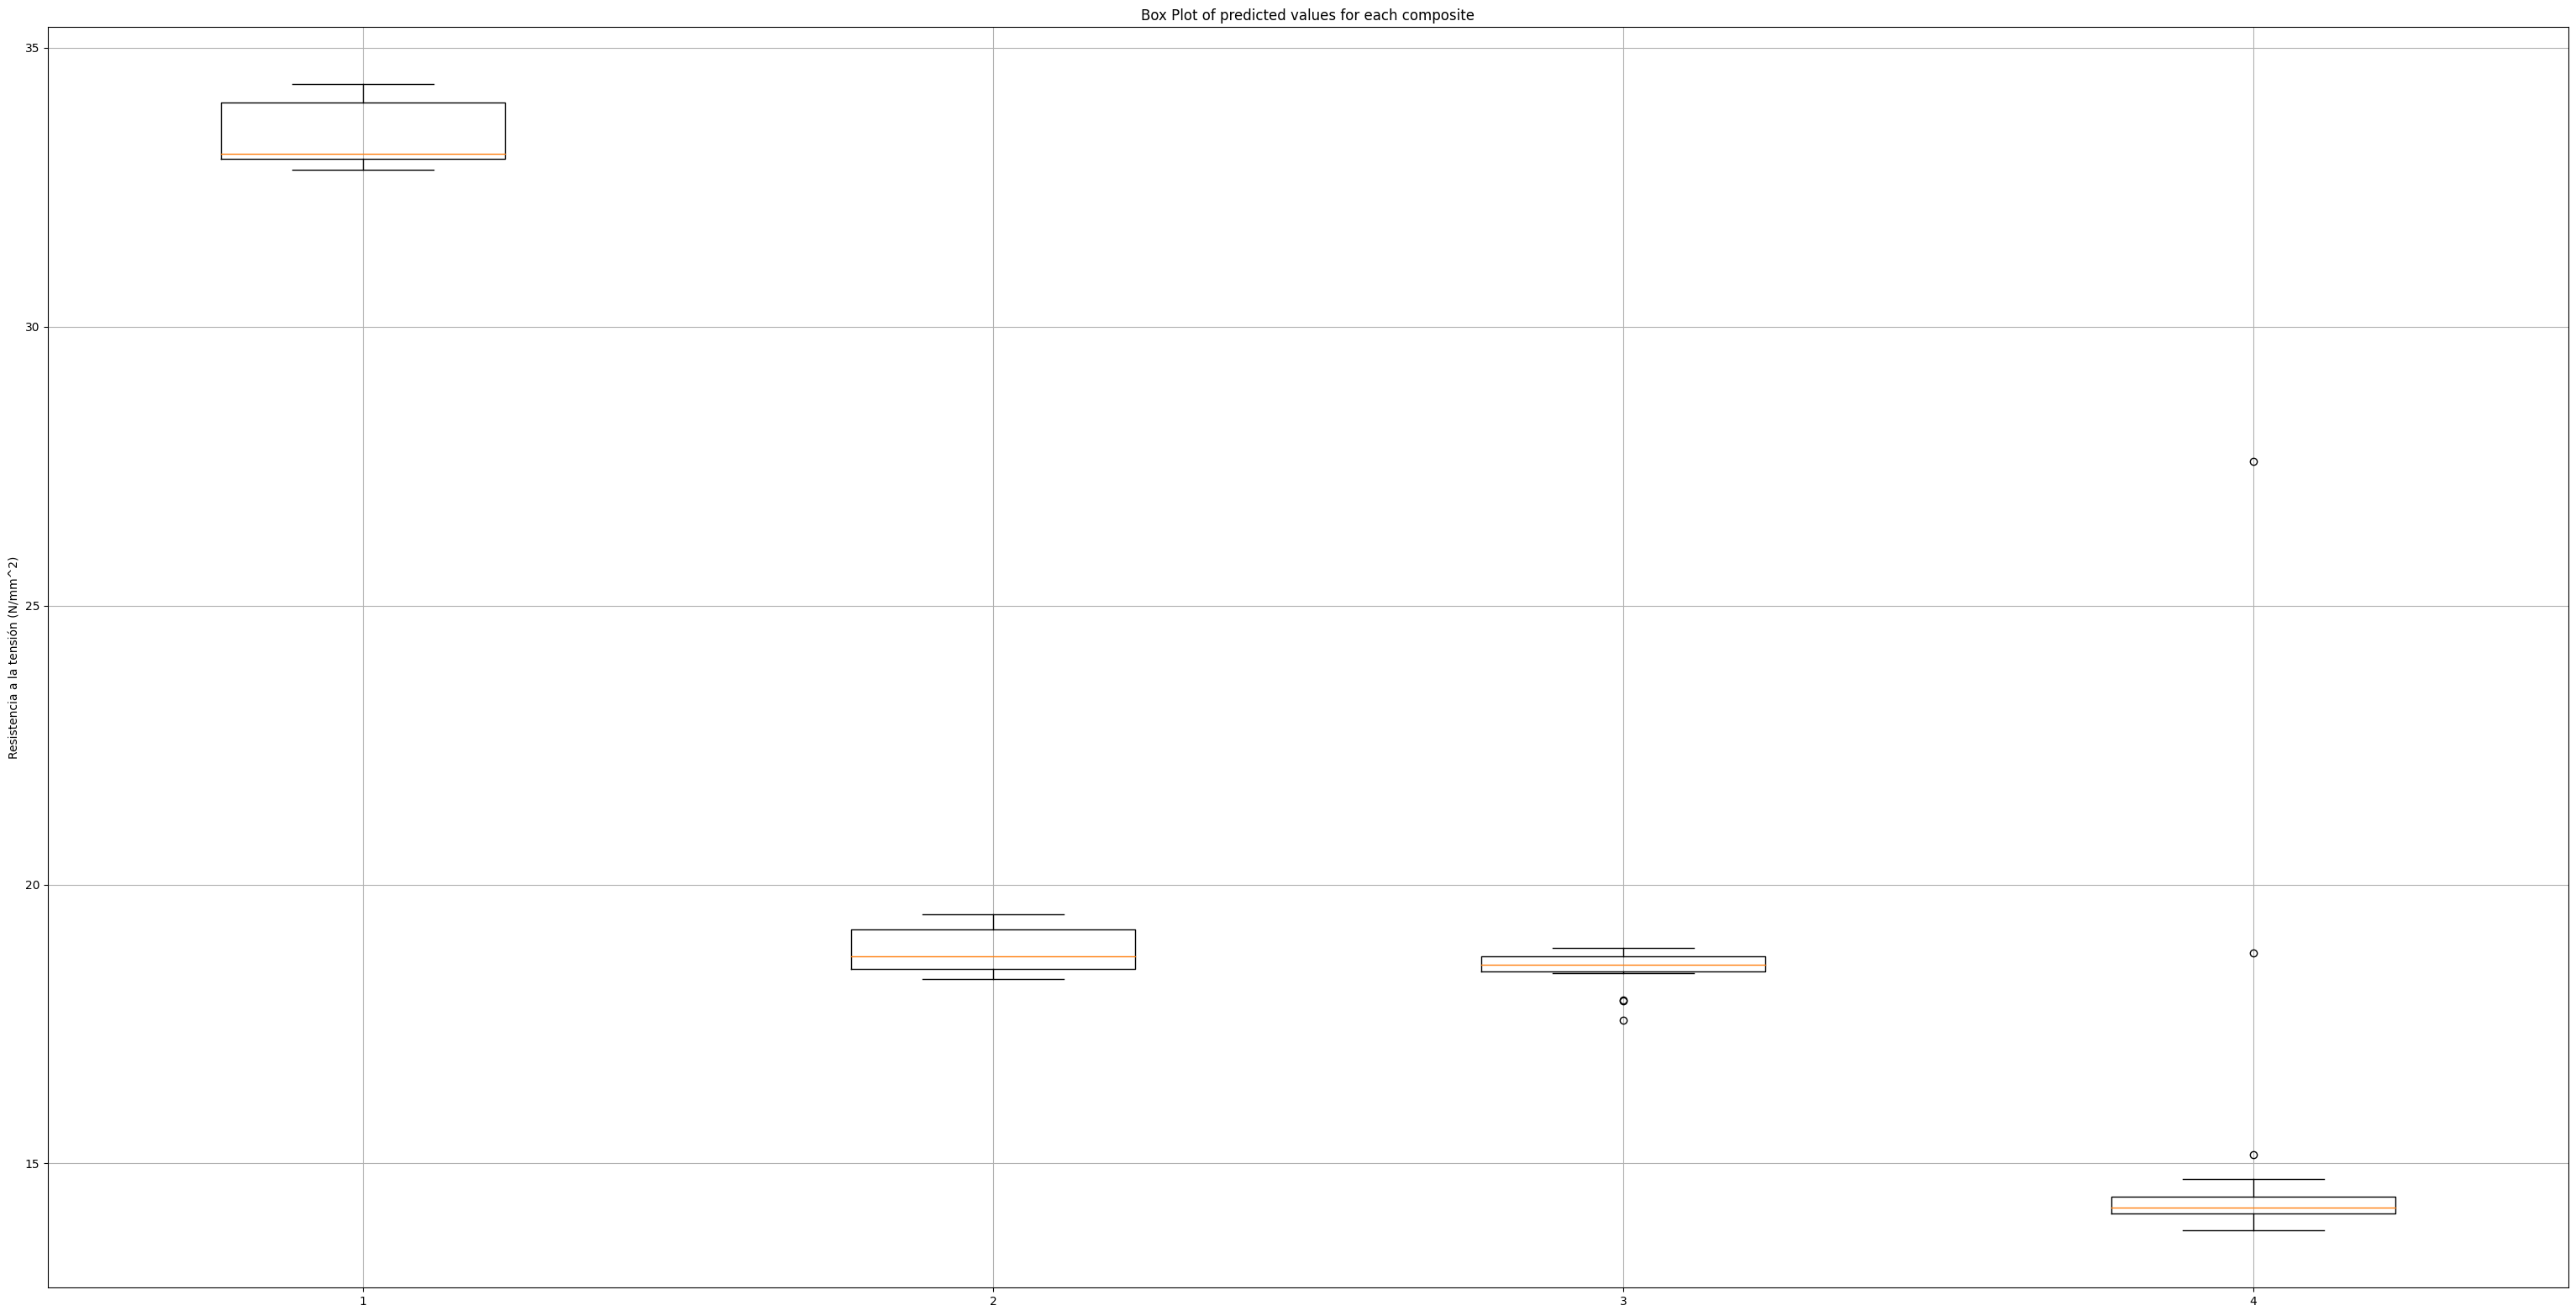

In [16]:
import matplotlib.pyplot as plt


 # Creating plot
data = [pva_0, pva_1, pva_2, pva_3]

fig = plt.figure(figsize =(10, 3))

# Creating axes instance
ax = fig.add_axes([0, 1, 3, 5])

# Creating plot
bp = ax.boxplot(data)
plt.title('Box Plot of predicted values for each composite')
plt.grid()
plt.ylabel('Resistencia a la tensión (N/mm^2)')
# show plot
plt.show()

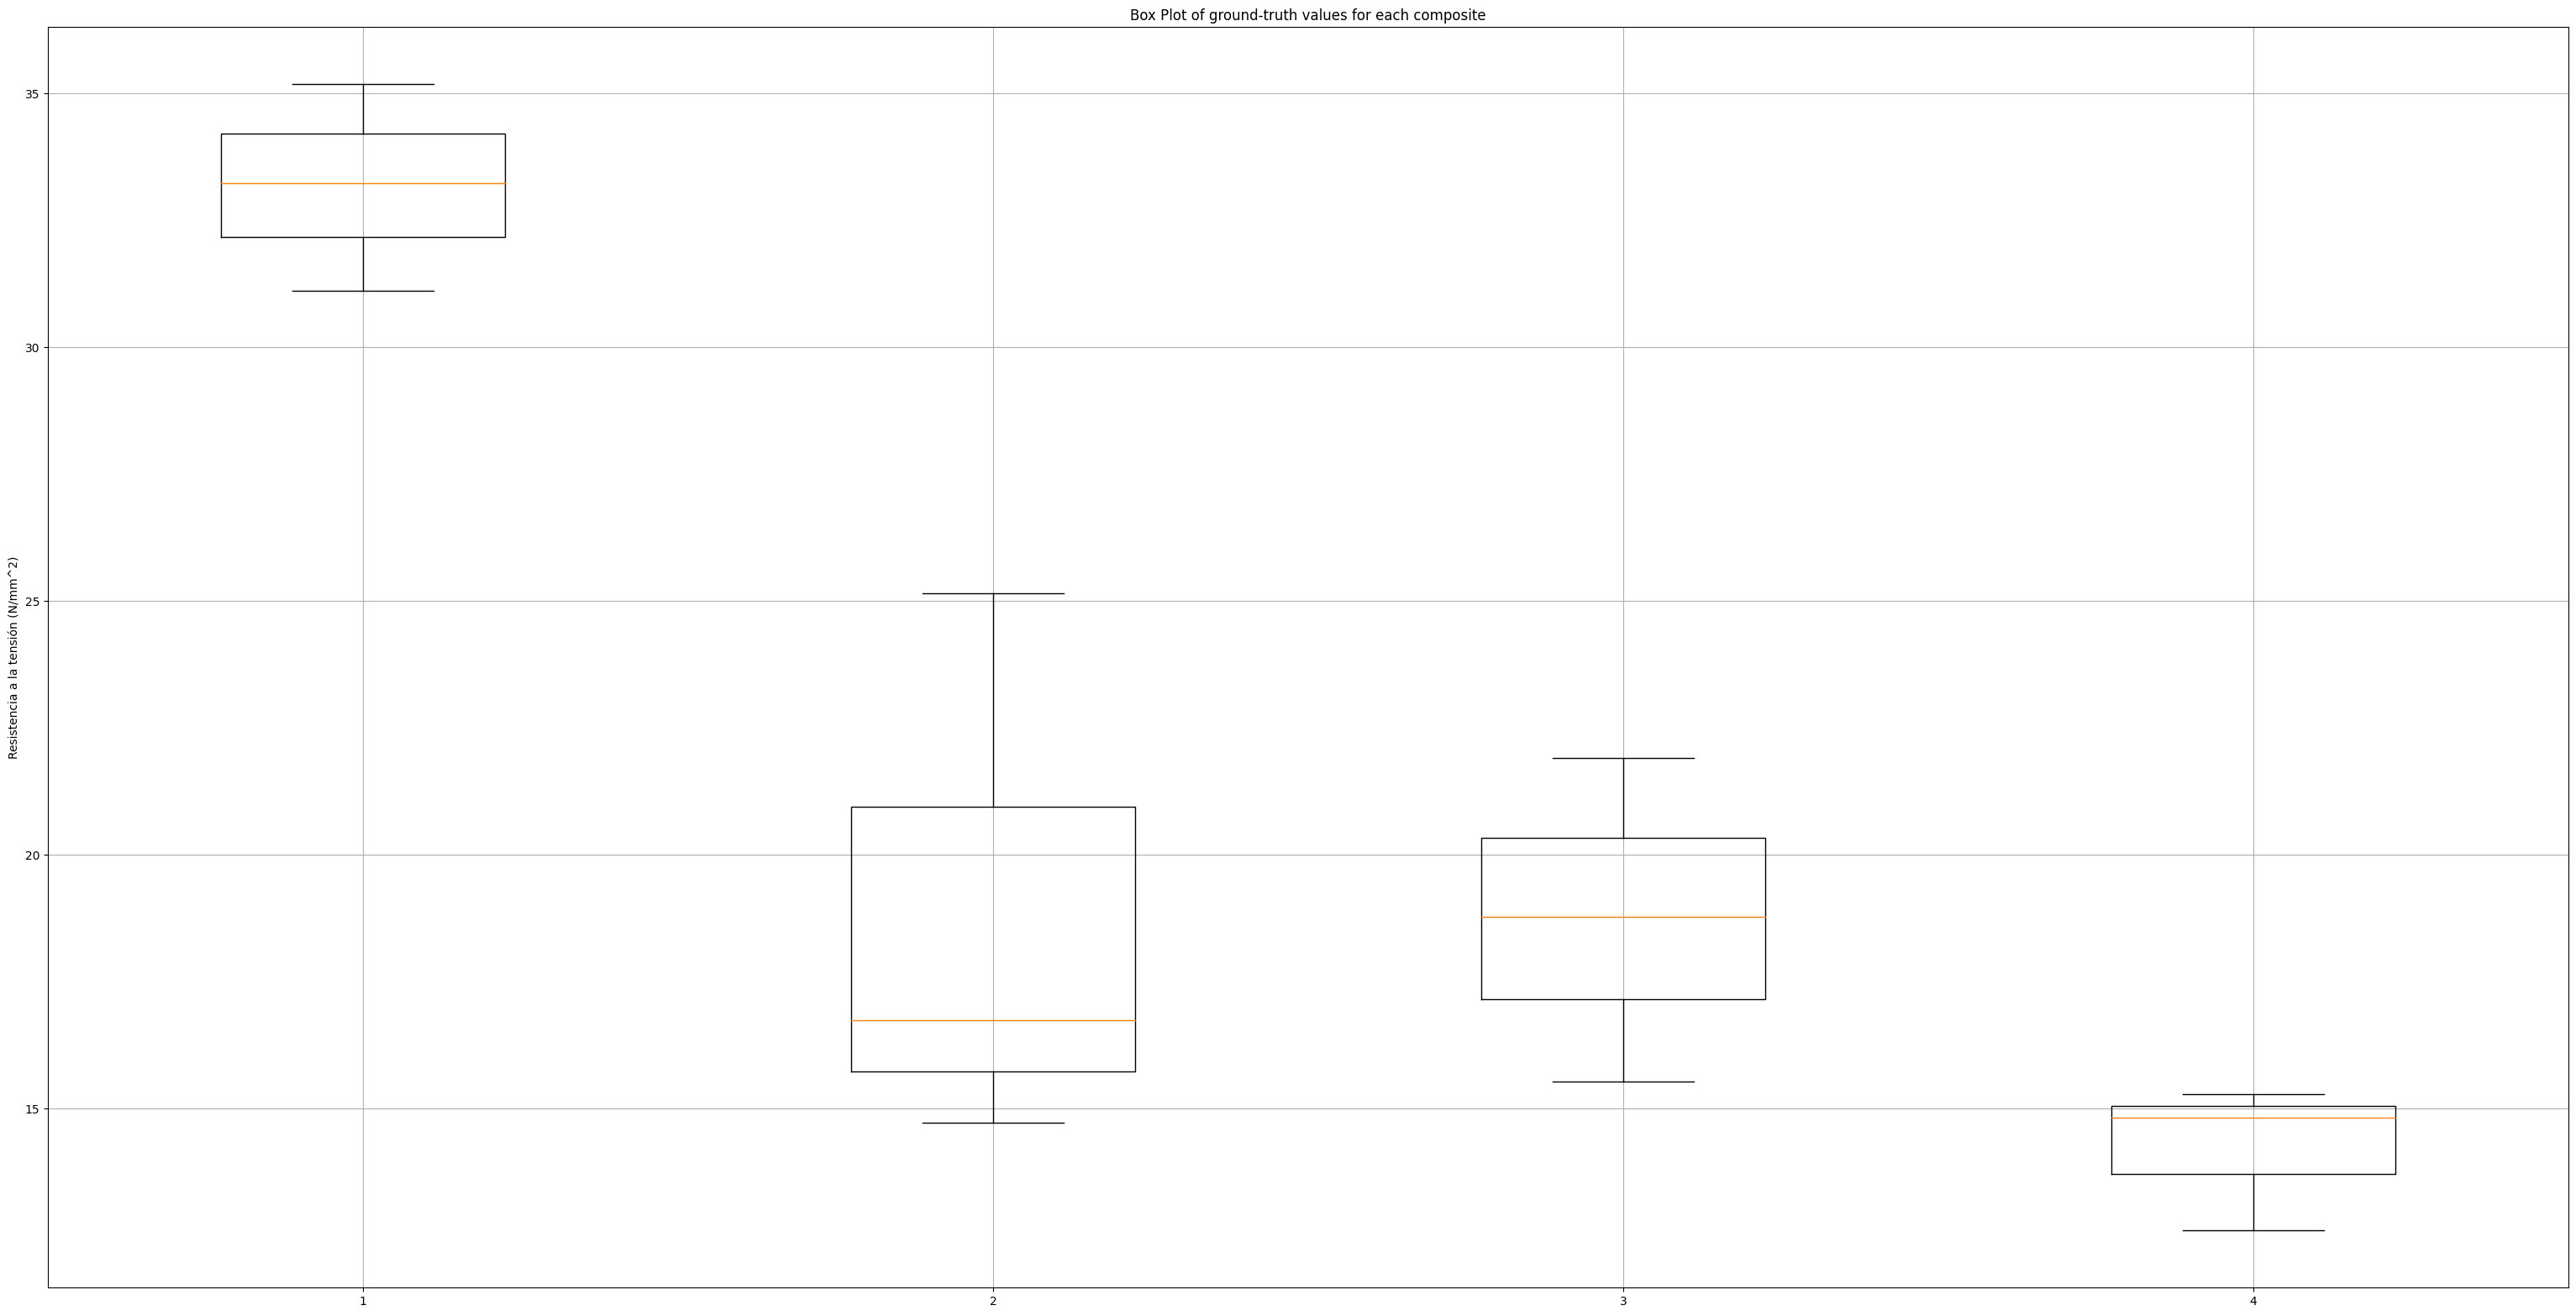

In [17]:
import matplotlib.pyplot as plt


 # Creating plot
data = [[35.18, 31.12, 33.24], [25.16, 14.72, 16.74], [21.91, 15.53, 18.77], [14.82, 15.28, 12.6]]

fig = plt.figure(figsize =(10, 3))

# Creating axes instance
ax = fig.add_axes([0, 1, 3, 5])

# Creating plot
bp = ax.boxplot(data)
plt.title('Box Plot of ground-truth values for each composite')
plt.grid()
plt.ylabel('Resistencia a la tensión (N/mm^2)')
# show plot
plt.show()